In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
import ast

drive.mount('/content/gdrive')
!unzip /content/gdrive/MyDrive/glove.6B.50d.zip


Mounted at /content/gdrive
Archive:  /content/gdrive/MyDrive/glove.6B.50d.zip
  inflating: glove.6B.50d.txt        
  inflating: __MACOSX/._glove.6B.50d.txt  


In [ ]:
# Load the CSV file
file_path = '/content/balanced-lyrics-for-genre-and-mood2.csv'
lyrics_data = pd.read_csv(file_path)

In [ ]:
lyrics_and_labels = lyrics_data[['lyrics', 'merged_labels']]
lyrics_and_labels['merged_labels'] = lyrics_and_labels['merged_labels'].apply(ast.literal_eval)

lyrics_and_labels.head()


<ipython-input-32-61fa33fb3749>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_and_labels['merged_labels'] = lyrics_and_labels['merged_labels'].apply(ast.literal_eval)


,lyrics,merged_labels
0,You expose the film in me\nWe're drawing rings...,"[electronic, rock, happy/celebration/party/dance]"
1,[Verse 1]\nSince we're feeling so anaesthetise...,"[rock, loss/sad/heartbreak/angst/protest]"
2,[Intro]\n(You are stellar)\n\n[Verse 1]\nMeet ...,"[rock, funk&soul, romantic/love/passion/devotion]"
3,[Verse 1]\nYou know that I would love to see y...,"[rock, motivating/inspirational/uplifting/conf..."
4,Songs when they're true are all dedicated to y...,"[rock, loss/sad/heartbreak/angst/protest]"


In [ ]:
lyrics_and_labels['merged_labels']

0       [electronic, rock, happy/celebration/party/dance]
1               [rock, loss/sad/heartbreak/angst/protest]
2       [rock, funk&soul, romantic/love/passion/devotion]
3       [rock, motivating/inspirational/uplifting/conf...
4               [rock, loss/sad/heartbreak/angst/protest]
                              ...                        
2015    [rhythm&blues, loss/sad/heartbreak/angst/protest]
2016    [rhythm&blues, loss/sad/heartbreak/angst/protest]
2017    [rhythm&blues, rock, happy/celebration/party/d...
2018    [rhythm&blues, loss/sad/heartbreak/angst/protest]
2019    [rhythm&blues, rock, loss/sad/heartbreak/angst...
Name: merged_labels, Length: 2020, dtype: object

In [ ]:
from nltk.corpus import stopwords
import string
import re
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_lyrics(lyrics):
    lyrics = lyrics.lower()
    lyrics = re.sub(f'[{re.escape(string.punctuation)}]', '', lyrics)
    words = lyrics.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

lyrics_and_labels['lyrics'] = lyrics_and_labels['lyrics'].apply(preprocess_lyrics)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-34-09c6de994f6b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_and_labels['lyrics'] = lyrics_and_labels['lyrics'].apply(preprocess_lyrics)


In [ ]:
#ngram
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample data for demonstration
lyrics = lyrics_and_labels['lyrics']

# Bag of Words or n grams
ngram_vectorizer = CountVectorizer(max_features=2000, ngram_range=(1, 2))
ngram_lyrics = ngram_vectorizer.fit_transform(lyrics)


# Displaying shapes of the transformed data
ngram_lyrics.shape

(2020, 2000)

In [ ]:

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), norm='l2',max_features=5000)
tfidf_lyrics = tfidf_vectorizer.fit_transform(lyrics)

tfidf_lyrics.shape

(2020, 5000)

In [ ]:
#WordToVec
import gensim.downloader as api
from nltk.tokenize import word_tokenize
import nltk
import gensim

import numpy as np
import string

nltk.download('punkt')

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize into words
    return words

# Load a pre-trained Word2Vec model (e.g., 'word2vec-google-news-300')
# model = gensim.models.Word2Vec.load("/content/gdrive/MyDrive/word2vec-google-news-300.model")

model = api.load('word2vec-google-news-300')

# Sample lyrics data (use your full dataset here)
# sample_lyrics = lyrics_and_labels['lyrics']

# Vectorize the lyrics
word_vectors_lyrics = []
for lyric in lyrics:
    words = preprocess_text(lyric)
    # Filter out words not in the model's vocabulary
    words = [word for word in words if word in model.key_to_index]
    # Average the word vectors for the song
    if words:
        song_vector = np.mean(model[words], axis=0)
    else:
        song_vector = np.zeros(model.vector_size)  # Zero vector for songs with no known words
    word_vectors_lyrics.append(song_vector)

# Convert to numpy array
word_vectors_lyrics = np.array(word_vectors_lyrics)
word_vectors_lyrics.shape

del model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Glove

import numpy as np
import string
from nltk.tokenize import word_tokenize


# Function to load GloVe model
def load_glove_model(glove_file_path):
    glove_model = {}
    with open(glove_file_path, 'r', encoding='utf-8') as file:
        for line in file:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    return glove_model

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize into words
    return words

# Load the GloVe model (update the file path to your GloVe file)
glove_model = api.load("glove-wiki-gigaword-100")

# Sample lyrics data (use your full dataset here)
# sample_lyrics = lyrics_and_labels['lyrics'].head(20)

# Vectorize the lyrics
glove_vectors_lyrics = []
for lyric in lyrics:
    words = preprocess_text(lyric)
    # Filter out words not in the GloVe model
    word_vecs = [glove_model[word] for word in words if word in glove_model]
    # Average the word vectors for the song
    if word_vecs:
        song_vector = np.mean(word_vecs, axis=0)
    else:
        song_vector = np.zeros(len(next(iter(glove_model.values()))))  # Zero vector for no known words
    glove_vectors_lyrics.append(song_vector)

# Convert to numpy array
glove_vectors_lyrics = np.array(glove_vectors_lyrics)
glove_vectors_lyrics.shape

del glove_model

In [ ]:
# Hyperparameters
epochs=100
batch_size=32


In [ ]:
from keras.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, hamming_loss
import matplotlib.pyplot as plt

threshold=0.5
def exact_match_accuracy(true_labels, predictions):
    # print(true_labels)
    # print(predictions)
    exact_match = np.all(true_labels == predictions, axis=1)
    # print(exact_match)
    ema_accuracy = np.mean(exact_match)
    genre_true, mood_true = true_labels[:, :8], true_labels[:, 8:]
    genre_pred, mood_pred = predictions[:, :8], predictions[:, 8:]
    exact_match_genre = np.all(genre_true == genre_pred, axis=1)
    exact_match_mood = np.all(mood_true == mood_pred, axis=1)
    exact_match_genres = np.mean(exact_match_genre)
    exact_match_moods = np.mean(exact_match_mood)
    return ema_accuracy, exact_match_genres, exact_match_moods

def plot_metrics(callback_history,history,title):
    f1 = [entry['val_f1_micro'] for entry in callback_history]
    precision = [entry['val_precision_micro'] for entry in callback_history]
    recall = [entry['val_recall_micro'] for entry in callback_history]
    hamming_loss = [entry['val_hamming_loss'] for entry in callback_history]
    ema_accuracies = [entry['ema_accuracy'] for entry in callback_history]
    exact_match_genres = [entry['exact_match_genres'] for entry in callback_history]
    exact_match_moods = [entry['exact_match_moods'] for entry in callback_history]

    # Summarize history for loss

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    plt.plot(f1, label='F1 Score')
    plt.plot(precision, label='Precision')
    plt.plot(recall, label='Recall')
    plt.plot(hamming_loss, label='Hamming Loss')
    plt.plot(ema_accuracies, label='EMA')
    plt.plot(exact_match_genres, label="EMA_Genre")
    plt.plot(exact_match_moods, label="EMA_Mood")
    plt.title('validation Metrics')
    plt.ylabel('Metric Value')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'],label="Training Loss")
    plt.plot(history.history['val_loss'],label="Validation Loss")
    plt.title('Training & Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.suptitle(title, size=16)
    # plt.show()
    plt.savefig(title+'.png')




def print_metrics(model,X,true_labels):
  predictions=model.predict(X)
  predictions[predictions >= threshold] = 1
  predictions[predictions < threshold] = 0
  f1 = f1_score(true_labels, predictions, average='micro')
  precision = precision_score(true_labels, predictions, average='micro')
  recall = recall_score(true_labels, predictions, average='micro')
  f1_mac = f1_score(true_labels, predictions, average='macro')
  precision_mac = precision_score(true_labels, predictions, average='macro')
  recall_mac = recall_score(true_labels, predictions, average='macro')
  f1_w = f1_score(true_labels, predictions, average='weighted')
  precision_w = precision_score(true_labels, predictions, average='weighted')
  recall_w = recall_score(true_labels, predictions, average='weighted')
  hamming = hamming_loss(true_labels, predictions)
  ema_score,ema_genre,ema_mood = exact_match_accuracy(true_labels, predictions)

  print(f"F1 Score: {f1:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score Macro: {f1_mac:.4f}")
  print(f"Precision Macro: {precision_mac:.4f}")
  print(f"Recall Macro: {recall_mac:.4f}")
  print(f"F1 Score W: {f1_w:.4f}")
  print(f"Precision W: {precision_w:.4f}")
  print(f"Recall W: {recall_w:.4f}")
  print(f"Hamming Loss: {hamming:.4f}")
  print(f"Exact Match Accuracy: {ema_score:.4f}")
  print(f"Exact Match Accuracy Mood: {ema_mood:.4f}")
  print(f"Exact Match Accuracy Genre: {ema_genre:.4f}")

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss
from tensorflow.keras.callbacks import Callback

class CustomMetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.metrics_history = []

    def on_epoch_end(self, epoch, logs=None):
        # Predict on validation data
        val_predictions = self.model.predict(self.validation_data[0])
        val_true_labels = self.validation_data[1]

        # Convert predictions to binary (0 or 1) if it's not already
        # val_predictions = (val_predictions > 0.5)

        val_predictions[val_predictions >= threshold] = 1
        val_predictions[val_predictions < threshold] = 0

        # Calculate metrics
        metrics = {
            'val_f1_micro': f1_score(val_true_labels, val_predictions, average='micro',zero_division=0),
            'val_precision_micro': precision_score(val_true_labels, val_predictions, average='micro',zero_division=0),
            'val_recall_micro': recall_score(val_true_labels, val_predictions, average='micro',zero_division=0),
            'val_f1_macro': f1_score(val_true_labels, val_predictions, average='macro',zero_division=0),
            'val_precision_macro': precision_score(val_true_labels, val_predictions, average='macro',zero_division=0),
            'val_recall_macro': recall_score(val_true_labels, val_predictions, average='macro',zero_division=0),
            'val_f1_weighted': f1_score(val_true_labels, val_predictions, average='weighted',zero_division=0),
            'val_precision_weighted': precision_score(val_true_labels, val_predictions, average='weighted',zero_division=0),
            'val_recall_weighted': recall_score(val_true_labels, val_predictions, average='weighted',zero_division=0),
            'val_hamming_loss': hamming_loss(val_true_labels, val_predictions),
        }

        # Calculate custom exact match accuracies
        ema_accuracy, exact_match_genres, exact_match_moods = exact_match_accuracy(val_true_labels, val_predictions)
        metrics['ema_accuracy'] = ema_accuracy
        metrics['exact_match_genres'] = exact_match_genres
        metrics['exact_match_moods'] = exact_match_moods

        # Add custom metrics to logs
        # logs.update(metrics)
        self.metrics_history.append(metrics)




In [ ]:

from sklearn.preprocessing import MultiLabelBinarizer
labels = lyrics_and_labels['merged_labels']

mlb = MultiLabelBinarizer()
binary_labels = mlb.fit_transform(lyrics_and_labels['merged_labels'])
print(binary_labels.shape)
print(binary_labels[0])

(2020, 12)
[1 0 0 1 0 0 0 0 0 0 1 0]


In [ ]:
# Define the MLP model
def create_mlp(n_features,n_labels):

  model = Sequential([
      Dense(1024, activation='relu', input_shape=(n_features,)),
      Dropout(0.1),
      Dense(n_labels, activation='sigmoid')
      ])
  return model

In [ ]:
# LSTM with ngram

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from keras.metrics import AUC

X_train, X_test, y_train, y_test = train_test_split(ngram_lyrics, binary_labels, test_size=0.2, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()
print(X_train.shape,y_train.shape)

# Number of features in your input data
n_features = ngram_lyrics.shape[1]
n_labels = binary_labels.shape[1]

# Usage
mlp_model_with_ngram_callback = CustomMetricsCallback(validation_data=(X_test, y_test))

mlp_model_with_ngram=create_mlp(n_features,n_labels)
mlp_model_with_ngram.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


(1616, 2000) (1616, 12)


In [ ]:
# history_mlp_model_with_ngram=mlp_model_with_ngram.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[mlp_model_with_ngram_callback])
history_mlp_model_with_ngram=mlp_model_with_ngram.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[mlp_model_with_ngram_callback])


Epoch 1/100
51/51 [==============================] - 1s 10ms/step - loss: 0.4114 - accuracy: 0.2785 - val_loss: 0.3034 - val_accuracy: 0.3738
Epoch 2/100
51/51 [==============================] - 0s 7ms/step - loss: 0.1433 - accuracy: 0.4239 - val_loss: 0.2669 - val_accuracy: 0.3292
Epoch 3/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0721 - accuracy: 0.4332 - val_loss: 0.2791 - val_accuracy: 0.3292
Epoch 4/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0422 - accuracy: 0.4474 - val_loss: 0.2980 - val_accuracy: 0.3218
Epoch 5/100
51/51 [==============================] - 0s 7ms/step - loss: 0.0274 - accuracy: 0.4097 - val_loss: 0.3182 - val_accuracy: 0.3243
Epoch 6/100
51/51 [==============================] - 0s 9ms/step - loss: 0.0185 - accuracy: 0.4375 - val_loss: 0.3412 - val_accuracy: 0.3168
Epoch 7/100
51/51 [==============================] - 0s 10ms/step - loss: 0.0137 - accuracy: 0.4214 - val_loss: 0.3553 - val_accuracy: 0.3020
Epoch 8/100

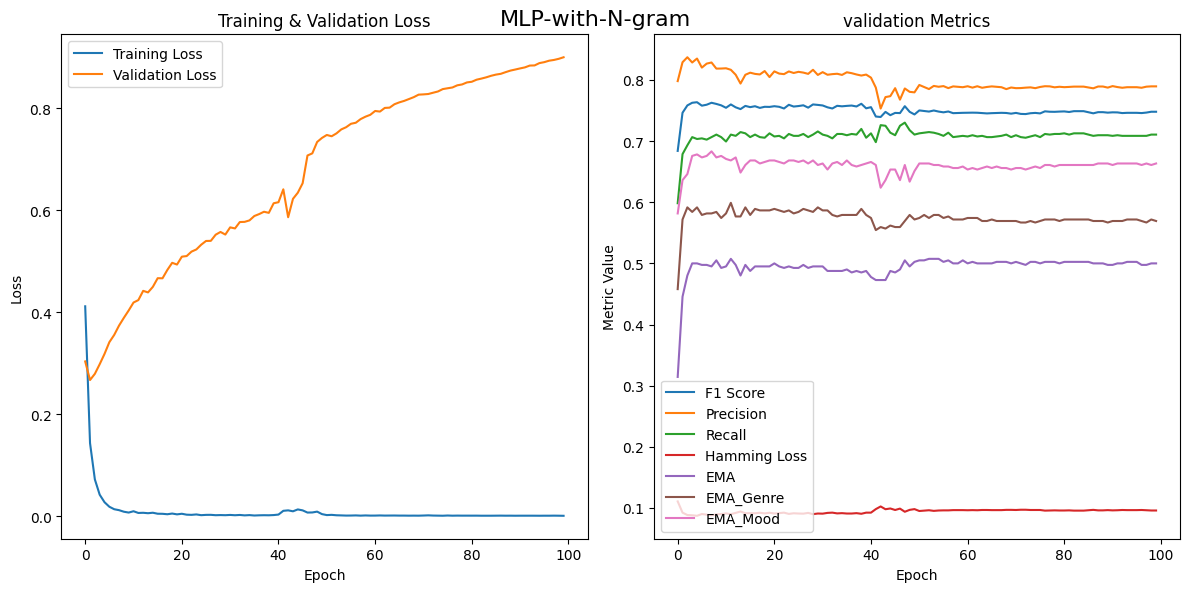

In [ ]:
plot_metrics(mlp_model_with_ngram_callback.metrics_history,history_mlp_model_with_ngram,"MLP-with-N-gram")

In [ ]:
print("MLP with N-gram")
print("Training Metrics")

print_metrics(mlp_model_with_ngram,X_train,y_train)

print("\nTesting Metrics")

print_metrics(mlp_model_with_ngram,X_test,y_test)

MLP with N-gram
Training Metrics
51/51 [==============================] - 0s 2ms/step
F1 Score: 0.9986
Precision: 0.9987
Recall: 0.9985
F1 Score Macro: 0.9986
Precision Macro: 0.9986
Recall Macro: 0.9986
F1 Score W: 0.9986
Precision W: 0.9987
Recall W: 0.9985
Hamming Loss: 0.0006
Exact Match Accuracy: 0.9957
Exact Match Accuracy Mood: 0.9969
Exact Match Accuracy Genre: 0.9963

Testing Metrics
13/13 [==============================] - 0s 2ms/step
F1 Score: 0.7480
Precision: 0.7895
Recall: 0.7106
F1 Score Macro: 0.7769
Precision Macro: 0.8151
Recall Macro: 0.7453
F1 Score W: 0.7461
Precision W: 0.7888
Recall W: 0.7106
Hamming Loss: 0.0959
Exact Match Accuracy: 0.5000
Exact Match Accuracy Mood: 0.6634
Exact Match Accuracy Genre: 0.5693


In [ ]:
#MLP with TF-IDF
tfidf_lyrics.shape
binary_labels.shape

n_features = tfidf_lyrics.shape[1]
n_labels = binary_labels.shape[1]

X_train, X_test, y_train, y_test = train_test_split(tfidf_lyrics, binary_labels, test_size=0.2, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()
print(X_train.shape,y_train.shape)

mlp_model_with_tfidf_callback = CustomMetricsCallback(validation_data=(X_test, y_test))


mlp_model_with_tfidf=create_mlp(n_features,n_labels)
mlp_model_with_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_mlp_model_with_tfidf=mlp_model_with_tfidf.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[mlp_model_with_tfidf_callback])

(1616, 5000) (1616, 12)
Epoch 1/100
51/51 [==============================] - 1s 12ms/step - loss: 0.5270 - accuracy: 0.1726 - val_loss: 0.4418 - val_accuracy: 0.2525
Epoch 2/100
51/51 [==============================] - 0s 9ms/step - loss: 0.3688 - accuracy: 0.3323 - val_loss: 0.3454 - val_accuracy: 0.3193
Epoch 3/100
51/51 [==============================] - 0s 8ms/step - loss: 0.2415 - accuracy: 0.3868 - val_loss: 0.2742 - val_accuracy: 0.3465
Epoch 4/100
51/51 [==============================] - 0s 9ms/step - loss: 0.1446 - accuracy: 0.4140 - val_loss: 0.2398 - val_accuracy: 0.3515
Epoch 5/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0868 - accuracy: 0.4158 - val_loss: 0.2292 - val_accuracy: 0.3515
Epoch 6/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0539 - accuracy: 0.4295 - val_loss: 0.2305 - val_accuracy: 0.3589
Epoch 7/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0354 - accuracy: 0.4171 - val_loss: 0.2382 - val_accur

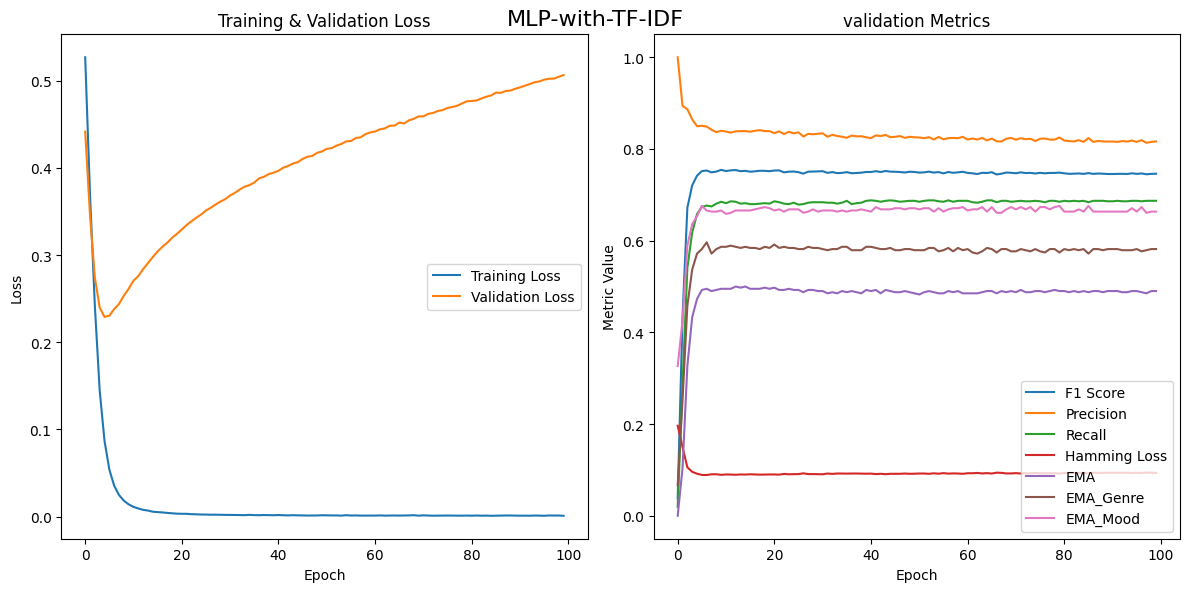

In [ ]:
plot_metrics(mlp_model_with_tfidf_callback.metrics_history,history_mlp_model_with_tfidf,"MLP-with-TF-IDF")

In [ ]:
print(" # MLP with TF-IDF")
print("\nTraining Metrics")
print_metrics(mlp_model_with_tfidf,X_train,y_train)
print("\nTesting Metrics")
print_metrics(mlp_model_with_tfidf,X_test,y_test)

 # MLP with TF-IDF

Training Metrics
51/51 [==============================] - 0s 2ms/step
F1 Score: 0.9986
Precision: 0.9995
Recall: 0.9977
F1 Score Macro: 0.9986
Precision Macro: 0.9993
Recall Macro: 0.9979
F1 Score W: 0.9986
Precision W: 0.9995
Recall W: 0.9977
Hamming Loss: 0.0006
Exact Match Accuracy: 0.9938
Exact Match Accuracy Mood: 0.9969
Exact Match Accuracy Genre: 0.9963

Testing Metrics
13/13 [==============================] - 0s 2ms/step
F1 Score: 0.7461
Precision: 0.8164
Recall: 0.6869
F1 Score Macro: 0.7744
Precision Macro: 0.8375
Recall Macro: 0.7262
F1 Score W: 0.7423
Precision W: 0.8139
Recall W: 0.6869
Hamming Loss: 0.0936
Exact Match Accuracy: 0.4901
Exact Match Accuracy Mood: 0.6634
Exact Match Accuracy Genre: 0.5817


In [ ]:
#MLP with WordToVec
word_vectors_lyrics.shape
binary_labels.shape

n_features = word_vectors_lyrics.shape[1]
n_labels = binary_labels.shape[1]

X_train, X_test, y_train, y_test = train_test_split(word_vectors_lyrics, binary_labels, test_size=0.2, random_state=42)
# X_train = X_train.toarray()
# X_test = X_test.toarray()
print(X_train.shape,y_train.shape)


mlp_model_with_wordtovec_callback = CustomMetricsCallback(validation_data=(X_test, y_test))

mlp_model_with_wordtovec=create_mlp(n_features,n_labels)
mlp_model_with_wordtovec.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history_mlp_model_with_wordtovec=mlp_model_with_wordtovec.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[mlp_model_with_wordtovec_callback])


(1616, 300) (1616, 12)
Epoch 1/100
51/51 [==============================] - 1s 11ms/step - loss: 0.5016 - accuracy: 0.1683 - val_loss: 0.4592 - val_accuracy: 0.2673
Epoch 2/100
51/51 [==============================] - 0s 6ms/step - loss: 0.4476 - accuracy: 0.2358 - val_loss: 0.4335 - val_accuracy: 0.3243
Epoch 3/100
51/51 [==============================] - 0s 7ms/step - loss: 0.4220 - accuracy: 0.2828 - val_loss: 0.4107 - val_accuracy: 0.2896
Epoch 4/100
51/51 [==============================] - 0s 6ms/step - loss: 0.4030 - accuracy: 0.2995 - val_loss: 0.3936 - val_accuracy: 0.3465
Epoch 5/100
51/51 [==============================] - 1s 15ms/step - loss: 0.3865 - accuracy: 0.3150 - val_loss: 0.3833 - val_accuracy: 0.3936
Epoch 6/100
51/51 [==============================] - 0s 9ms/step - loss: 0.3723 - accuracy: 0.3311 - val_loss: 0.3710 - val_accuracy: 0.3490
Epoch 7/100
51/51 [==============================] - 0s 7ms/step - loss: 0.3628 - accuracy: 0.3304 - val_loss: 0.3624 - val_accur

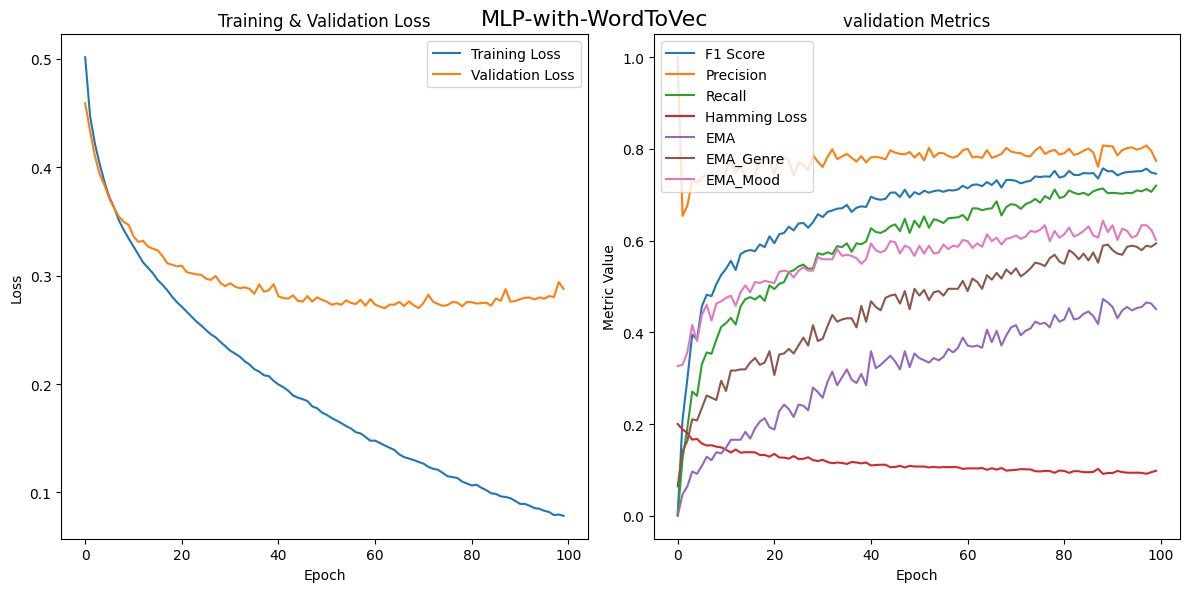

In [ ]:
plot_metrics(mlp_model_with_wordtovec_callback.metrics_history,history_mlp_model_with_wordtovec,"MLP-with-WordToVec")

In [ ]:

print("# MLP with WordToVec")
print("\nTraining Metrics")
print_metrics(mlp_model_with_wordtovec,X_train,y_train)
print("\nTesting Metrics")
print_metrics(mlp_model_with_wordtovec,X_test,y_test)

# MLP with WordToVec

Training Metrics
51/51 [==============================] - 0s 2ms/step
F1 Score: 0.9556
Precision: 0.9651
Recall: 0.9463
F1 Score Macro: 0.9631
Precision Macro: 0.9722
Recall Macro: 0.9554
F1 Score W: 0.9557
Precision W: 0.9669
Recall W: 0.9463
Hamming Loss: 0.0179
Exact Match Accuracy: 0.8236
Exact Match Accuracy Mood: 0.8725
Exact Match Accuracy Genre: 0.9325

Testing Metrics
13/13 [==============================] - 0s 2ms/step
F1 Score: 0.7460
Precision: 0.7741
Recall: 0.7199
F1 Score Macro: 0.7657
Precision Macro: 0.7967
Recall Macro: 0.7444
F1 Score W: 0.7468
Precision W: 0.7863
Recall W: 0.7199
Hamming Loss: 0.0982
Exact Match Accuracy: 0.4505
Exact Match Accuracy Mood: 0.6015
Exact Match Accuracy Genre: 0.5941


In [ ]:
#MLP with Glove
glove_vectors_lyrics.shape
binary_labels.shape

n_features = glove_vectors_lyrics.shape[1]
n_labels = binary_labels.shape[1]

X_train, X_test, y_train, y_test = train_test_split(glove_vectors_lyrics, binary_labels, test_size=0.2, random_state=42)
# X_train = X_train.toarray()
# X_test = X_test.toarray()
print(glove_vectors_lyrics.shape,binary_labels.shape)
print(n_features,n_labels)
print(X_train.shape,y_train.shape)

mlp_model_with_glove_callback = CustomMetricsCallback(validation_data=(X_test, y_test))


mlp_model_with_glove=create_mlp(n_features,n_labels)
mlp_model_with_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_mlp_model_with_glove=mlp_model_with_glove.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[mlp_model_with_glove_callback])


(2020, 100) (2020, 12)
100 12
(1616, 100) (1616, 12)
Epoch 1/100
51/51 [==============================] - 1s 10ms/step - loss: 0.5003 - accuracy: 0.1343 - val_loss: 0.4592 - val_accuracy: 0.2822
Epoch 2/100
51/51 [==============================] - 1s 19ms/step - loss: 0.4481 - accuracy: 0.2710 - val_loss: 0.4321 - val_accuracy: 0.3490
Epoch 3/100
51/51 [==============================] - 0s 7ms/step - loss: 0.4276 - accuracy: 0.3045 - val_loss: 0.4169 - val_accuracy: 0.3292
Epoch 4/100
51/51 [==============================] - 1s 17ms/step - loss: 0.4108 - accuracy: 0.3014 - val_loss: 0.4047 - val_accuracy: 0.3441
Epoch 5/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3983 - accuracy: 0.3224 - val_loss: 0.3934 - val_accuracy: 0.3465
Epoch 6/100
51/51 [==============================] - 0s 6ms/step - loss: 0.3878 - accuracy: 0.3274 - val_loss: 0.3844 - val_accuracy: 0.3738
Epoch 7/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3795 - accuracy: 0.3218

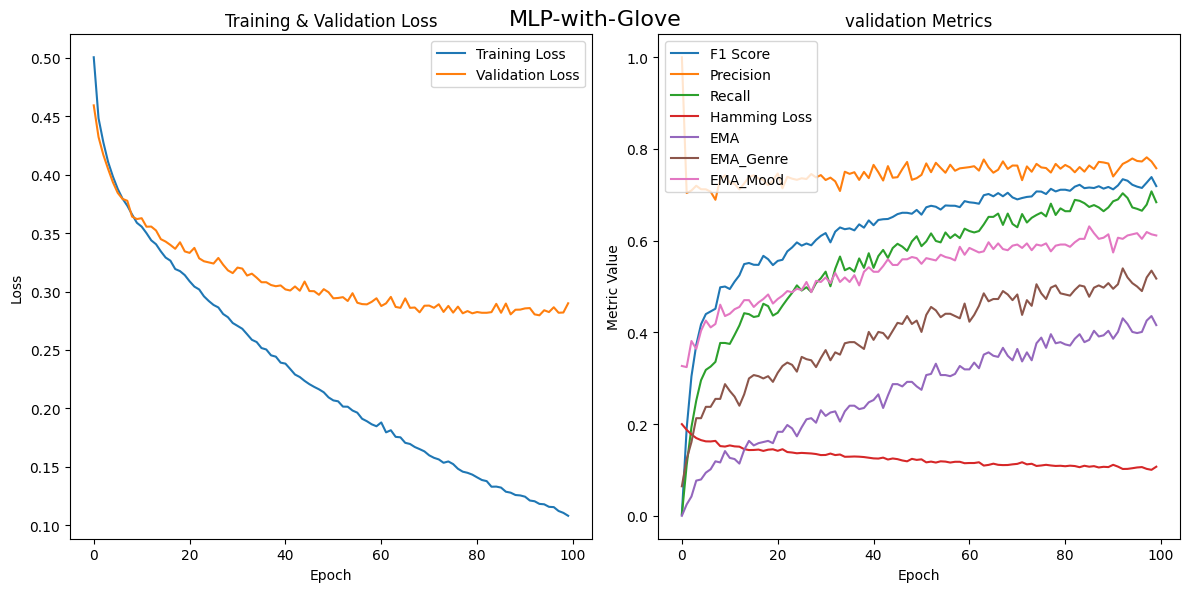

In [ ]:
plot_metrics(mlp_model_with_glove_callback.metrics_history,history_mlp_model_with_glove,"MLP-with-Glove")

In [ ]:
print("# MLP with Glove")
print("\nTraining Metrics")
print_metrics(mlp_model_with_glove,X_train,y_train)
print("\nTesting Metrics")
print_metrics(mlp_model_with_glove,X_test,y_test)

# MLP with Glove

Training Metrics
51/51 [==============================] - 0s 2ms/step
F1 Score: 0.9274
Precision: 0.9505
Recall: 0.9054
F1 Score Macro: 0.9346
Precision Macro: 0.9608
Recall Macro: 0.9118
F1 Score W: 0.9267
Precision W: 0.9515
Recall W: 0.9054
Hamming Loss: 0.0288
Exact Match Accuracy: 0.7500
Exact Match Accuracy Mood: 0.8496
Exact Match Accuracy Genre: 0.8533

Testing Metrics
13/13 [==============================] - 0s 2ms/step
F1 Score: 0.7190
Precision: 0.7580
Recall: 0.6838
F1 Score Macro: 0.7394
Precision Macro: 0.7890
Recall Macro: 0.7087
F1 Score W: 0.7154
Precision W: 0.7698
Recall W: 0.6838
Hamming Loss: 0.1071
Exact Match Accuracy: 0.4158
Exact Match Accuracy Mood: 0.6114
Exact Match Accuracy Genre: 0.5173


In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score



In [ ]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# XGBoost with ngram

X_train, X_test, y_train, y_test = train_test_split(ngram_lyrics, binary_labels, test_size=0.2, random_state=42)

xgboost_with_ngram = OneVsRestClassifier(XGBClassifier(n_estimators=20, objective='binary:logistic', eval_metric='logloss'))
xgboost_with_ngram.fit(X_train, y_train)
print("# XGBoost with ngram")
print("\nTraining Metrics")
print_metrics(xgboost_with_ngram,X_train,y_train)
print("\nTesting Metrics")
print_metrics(xgboost_with_ngram,X_test,y_test)

# XGBoost with ngram

Training Metrics
F1 Score: 0.9628
Precision: 0.9928
Recall: 0.9345
F1 Score Macro: 0.9644
Precision Macro: 0.9939
Recall Macro: 0.9384
F1 Score W: 0.9620
Precision W: 0.9930
Recall W: 0.9345
Hamming Loss: 0.0142
Exact Match Accuracy: 0.8475
Exact Match Accuracy Mood: 0.9503
Exact Match Accuracy Genre: 0.8879

Testing Metrics
F1 Score: 0.6214
Precision: 0.7770
Recall: 0.5177
F1 Score Macro: 0.5775
Precision Macro: 0.7829
Recall Macro: 0.4809
F1 Score W: 0.6083
Precision W: 0.7751
Recall W: 0.5177
Hamming Loss: 0.1258
Exact Match Accuracy: 0.1910
Exact Match Accuracy Mood: 0.5809
Exact Match Accuracy Genre: 0.3130


In [ ]:
# XGBoost with TF-IDF

X_train, X_test, y_train, y_test = train_test_split(tfidf_lyrics, binary_labels, test_size=0.2, random_state=42)

xgboost_with_tfidf = OneVsRestClassifier(XGBClassifier(n_estimators=20, objective='binary:logistic', eval_metric='logloss'))

xgboost_with_tfidf.fit(X_train, y_train)
print("# XGBoost with TF-IDF")
print("\nTraining Metrics")
print_metrics(xgboost_with_tfidf,X_train,y_train)
print("\nTesting Metrics")
print_metrics(xgboost_with_tfidf,X_test,y_test)

# XGBoost with TF-IDF

Training Metrics
F1 Score: 0.9772
Precision: 0.9959
Recall: 0.9592
F1 Score Macro: 0.9801
Precision Macro: 0.9955
Recall Macro: 0.9657
F1 Score W: 0.9770
Precision W: 0.9960
Recall W: 0.9592
Hamming Loss: 0.0088
Exact Match Accuracy: 0.9052
Exact Match Accuracy Mood: 0.9775
Exact Match Accuracy Genre: 0.9244

Testing Metrics
F1 Score: 0.6042
Precision: 0.7793
Recall: 0.4933
F1 Score Macro: 0.5588
Precision Macro: 0.7877
Recall Macro: 0.4579
F1 Score W: 0.5911
Precision W: 0.7722
Recall W: 0.4933
Hamming Loss: 0.1289
Exact Match Accuracy: 0.2175
Exact Match Accuracy Mood: 0.5968
Exact Match Accuracy Genre: 0.3395


In [ ]:
# XGBoost with WordToVec

X_train, X_test, y_train, y_test = train_test_split(word_vectors_lyrics, binary_labels, test_size=0.2, random_state=42)

xgboost_with_wordtovec = OneVsRestClassifier(XGBClassifier(n_estimators=20, objective='binary:logistic', eval_metric='logloss'))
xgboost_with_wordtovec.fit(X_train, y_train)

print("# XGBoost with WordToVec")
print("\nTraining Metrics")
print_metrics(xgboost_with_wordtovec,X_train,y_train)
print("\nTesting Metrics")
print_metrics(xgboost_with_wordtovec,X_test,y_test)

# XGBoost with WordToVec

Training Metrics
F1 Score: 0.9993
Precision: 0.9992
Recall: 0.9994
F1 Score Macro: 0.9991
Precision Macro: 0.9987
Recall Macro: 0.9994
F1 Score W: 0.9993
Precision W: 0.9992
Recall W: 0.9994
Hamming Loss: 0.0003
Exact Match Accuracy: 0.9980
Exact Match Accuracy Mood: 0.9987
Exact Match Accuracy Genre: 0.9980

Testing Metrics
F1 Score: 0.5164
Precision: 0.7240
Recall: 0.4013
F1 Score Macro: 0.4546
Precision Macro: 0.6982
Recall Macro: 0.3560
F1 Score W: 0.5020
Precision W: 0.7169
Recall W: 0.4013
Hamming Loss: 0.1499
Exact Match Accuracy: 0.1538
Exact Match Accuracy Mood: 0.5199
Exact Match Accuracy Genre: 0.2573


In [ ]:
# XGBoost with Glove

X_train, X_test, y_train, y_test = train_test_split(glove_vectors_lyrics, binary_labels, test_size=0.2, random_state=42)
# Initialize the OneVsRestClassifier with XGBClassifier
xgboost_with_glove = OneVsRestClassifier(XGBClassifier(n_estimators=20, objective='binary:logistic', eval_metric='logloss'))

xgboost_with_glove.fit(X_train, y_train)


print("# XGBoost with Glove")
print("\nTraining Metrics")
print_metrics(xgboost_with_glove,X_train,y_train)
print("\nTesting Metrics")
print_metrics(xgboost_with_glove,X_test,y_test)

# XGBoost with Glove

Training Metrics
F1 Score: 0.9919
Precision: 0.9974
Recall: 0.9865
F1 Score Macro: 0.9925
Precision Macro: 0.9976
Recall Macro: 0.9877
F1 Score W: 0.9918
Precision W: 0.9974
Recall W: 0.9865
Hamming Loss: 0.0031
Exact Match Accuracy: 0.9635
Exact Match Accuracy Mood: 0.9775
Exact Match Accuracy Genre: 0.9847

Testing Metrics
F1 Score: 0.5131
Precision: 0.6757
Recall: 0.4135
F1 Score Macro: 0.4530
Precision Macro: 0.6750
Recall Macro: 0.3646
F1 Score W: 0.4985
Precision W: 0.6701
Recall W: 0.4135
Hamming Loss: 0.1565
Exact Match Accuracy: 0.1698
Exact Match Accuracy Mood: 0.4934
Exact Match Accuracy Genre: 0.2679
